<div style="direction:rtl;line-height:300%;"> <font face="XB Zar">
<div align=center>
    <div style="font-size:18px; color: #E53935">
    به نام خدا
    </div>
    <br>
    <strong><div style="font-size:46px; color: #1B5E20">
        VAD با آستانه یابی وقفی
       <br>
        VAD با استفاده از کرنل گوسی
    </div></strong>
    <br>
    <div style="font-size:20px; color: #E53935">
      مائده نادهی 9712762238
    </div>
</div>
    <hr>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
فهرست محتویات
</div>         
<ul style="margin-right: 0;">
    <li><a href="#section1" style="color: #1B5E20;">VAD</a></li>
    <li><a href="#section2" style="color: #1B5E20;">STE:Short Time Energy</a>
    <li><a href="#section3" style="color: #1B5E20;">Threshold</a>
    <li><a href="#section4" style="color: #1B5E20;">Initial Value of Threshold</a>
    <li><a href="#section5" style="color: #1B5E20;">LED:Linear Energy-Based Detector</a> 
    <li><a href="#section6" style="color: #1B5E20;">ALED:Adaptive Linear Energy-Based Detector</a>
    <li><a href="#section7" style="color: #1B5E20;">Implementation of VAD with addaptive threshold</a>
    <li><a href="#section8" style="color: #1B5E20;">VAD using gaussian kernels</a>
    <li><a href="#section9" style="color: #1B5E20;">Implementation of VAD using gaussian kernels</a>
    <li><a href="#section10" style="color: #1B5E20;">Attachments</a>
    <ul>
        <li><a href="#section10" style="color: #1B5E20;">Hamming Window</a>
    </ul>
</ul>
</div>

<hr>
<div id="section1" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
VAD (Voice Activity Detection)
</div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
آشکارسازی فعالیت گفتار (Voice Activity Detection : VAD) روشی برای تفکیک سیگنال صوت نویزدار به تکه‌های سیگنال گفتاری(speech) و غیرگفتاری(non-speech) است.
روش‌های مختلفی برای پیاده‌سازی VAD  وجود دارد، اما روش‌های مبتنی بر انرژی(energy-based)دارای سادگی محاسباتی و دقت بالایی هستند.
</div>

<hr>
<div id="section2" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
STE (Short Time Energy)
</div>
</div>

<div id="eq1" style="font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    Energy of Frame  :
    <br>
    $E_j = \frac{1}{N}.\sum_{i=(j-1)\times N+1}^{j\times N} x^2(i)$
    <br>
    $E_j$ – energy of the j-th frame
</div>

<hr>
<div id="section3" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
Threshold 
</div>
</div>

<div style="font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    if ($E_j > k \times E_r$), where $k > 1$
    <br>
    $\qquad$ current frame is ACTIVE
    <br>
    else 
    <br>
    $\qquad$ current frame is INACTIVE
    <br>
    $E_r$ : energy of noise frames, $k \times E_r$ : ‘Threshold’ being used in the decision-making
</div>

<hr>
<div id="section7" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
Implementation of VAD with addaptive threshold
</div>
</div>

<div style="text-align: center; color: green;"> inspired by <br>
    <a href="https://github.com/idnavid/py_vad_tool"> https://github.com/idnavid/py_vad_tool </a> 
   <br> and <br>
<a href="https://www.researchgate.net/publication/40422675_Approach_for_Energy-Based_Voice_Detector_with_Adaptive_Scaling_Factor">
https://www.researchgate.net/publication/40422675_Approach_for_Energy-Based_Voice_Detector_with_Adaptive_Scaling_Factor
</a></div>
<br>

In [1]:
import numpy as np
import IPython.display as ipd
from scipy.signal.windows import hamming
from scipy.io import wavfile
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 5) # set the figure size
plt.rcParams['axes.grid'] = True  # set the grid on

In [2]:
def read_wav(filename):
    """
        read wav file.
        Normalizes signal to values between -1 and 1.
    """
    fs, s = wavfile.read(filename)  # scipy reads int
    s = np.array(s)/float(max(abs(s)))
    return fs,s

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
  deframe آرایه ی یک بعدی را تبدیل به ماتریسی از فریم ها میکند و enframe برعکس
  <br>
   win_len طول هر فریم را مشخص میکند که جزو پارامتر های این توابع اند  
   <br>
   hop_len نیز فاصله ی بین هر دو فریم را مشخص میکند 
</div> 

In [3]:
def enframe(x, win_len, hop_len):
    """
        receives a 1D numpy array and divides it into frames.
        outputs a numpy matrix with the frames on the rows.
    """
    x = np.squeeze(x)
    if x.ndim != 1:
        raise TypeError("enframe input must be a 1-dimensional array.")
    n_frames = 1 + np.int64(np.floor((len(x) - win_len) / float(hop_len)))
    x_framed = np.zeros((n_frames, win_len))
    for i in range(n_frames):
        x_framed[i] = x[i * hop_len : i * hop_len + win_len]
    return x_framed


def deframe(x_framed, win_len, hop_len):
    """
        interpolates 1D data with framed alignments into persample values.
        This function helps as a visual aid and can also be used to change 
        frame-rate for features, e.g. energy, zero-crossing, etc.
    """
    n_frames = len(x_framed)
    n_samples = (n_frames-1)*hop_len + win_len
    x_samples = np.zeros((n_samples,1))
    for i in range(n_frames):
        x_samples[i*hop_len : i*hop_len + win_len] = x_framed[i].reshape(-1,1)
    return x_samples

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    این تابع برای هر فریم میانگین مقادیر سیگنال در آن فریم را محاسبه میکند و از عناصر فریم این مقدار را کم میکند
</div> 

In [4]:
def zero_mean(xframes):
    """
        remove mean of framed signal
        return zero-mean frames.
    """
    m = np.mean(xframes,axis=1)
    xframes = xframes - np.tile(m,(xframes.shape[1],1)).T
    return xframes

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    درین قسمت برای smooth کردن فریم ها از hamming window استفاده شده است به این صورت که هر فریم در این پنجره ضرب می شود و حاصل جمع توان دو عناصر هر فریم 
    (<a href="#eq1">STE</a>)
    به عنوان انرژی آن فریم برگردانده می شود. جزئیات را در
    <a href='#section10'> این قسمت</a> 
    میتوانید مشاهده کنید
</div>

In [5]:
def compute_nrg(xframes):
    """
        calculate per frame energy
    """
    n_frames = xframes.shape[1]
    hamm_window = hamming(n_frames)
    weighted_matrix = xframes * hamm_window
    return np.diagonal(np.dot(weighted_matrix,weighted_matrix.T))/float(n_frames)

def compute_log_nrg(xframes):
    """
        calculate per frame energy in log
    """
    n_frames = xframes.shape[1]
    raw_nrgs = np.log(compute_nrg(xframes+1e-5))/float(n_frames)
    return (raw_nrgs - np.mean(raw_nrgs))/(np.sqrt(np.var(raw_nrgs)))

<hr>
<div id="section4" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
Initial Value of Threshold 
</div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    برای محاسبه‌ی مقدار اولیه آستانه می‌توان فرض کرد که 100 میلی ثانیه اولیه هر سیگنال صوتی‌ای حاوی هیچ گفتاری نیست.(با توجه به اینکه انسان‌ها قبل از شروع صحبت به زمان واکنش نیاز دارند، این فرض قابل قبول است.) این 100 میلی‌ثانیه اولیه inactive در نظر گرفته می‌شوند و انرژی میانگین آن به عنوان مقدار آستانه‌ی اولیه درنظر گرفته می‌شود. 
</div>
<div style="font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    mean  :
    <br>
    $E_r = \frac{1}{v}.\sum_{m=0}^{v} E_m$
    <br>
    $E_r$ – initial threshold estimate, υ – number of frames
</div>

In [6]:
def init_thr_cal(xnrgs, init_silence_len, win_len, hop_len):
    """
        calculate initial value of threshold
    """
    n = int((init_silence_len - win_len)/float(hop_len))
    init_thr = xnrgs[:n].mean()
    return init_thr     

<hr>
<div id="section5" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
LED : Linear Energy-Based Detector
</div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    از آنجایی که یک آستانه ثابت نسبت به محیط‌های صوتی مختلف عملکرد خوبی ندارد یک آستانه تطبیقی مناسب‌تر است.
    مقدار آستانه به صورت زیر آپدیت می‌شود :
</div>
<div id="eq2" style="font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    E<sub>r new</sub> = $(1-p)\times$E<sub>r old</sub> + $p\times$E<sub>silence</sub> $\qquad (0<p<1)$
    <br>
    E<sub>r new</sub> – updated value of the threshold, E<sub>r old</sub> – previous energy threshold, E<sub>silence</sub> –         energy of the most recent noise frame.
</div>

<hr>
<div id="section6" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
ALED : Adaptive Linear Energy-Based Detector
</div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    نقطه ضعف LED این است که ضریب p در معادله قبل نسبت به آمار نویز حساس نیست.
    <br>
    مقدار آستانه $E_r$ را می توان به طور متناوب بر اساس آمار فریم های inactive محاسبه کرد. يعنی باید از یک بافر جدیدترین m فریم inactive  استفاده شود. هر زمان که یک فریم نویز جدید شناسایی شد، به بافر اضافه می شود و قدیمی ترین آنها حذف می شود.
  (در تابع nrg_vad آرایه ی inactive_patches نمایانگر این بافر است.) 
</div>
<br>
<div style="font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    σ = VAR[E<sub>silence</sub>]
    <br>
    σ - variance of the buffer
</div>
<hr>
<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    لحظه اضافه شدن یک فریم inactive جدید به بافر نویز را در نظر بگیرید. واریانس، درست قبل از اضافه شدن را با σ<sub>old</sub> نشان می دهیم. پس از افزودن فریم inactive جدید، واریانس σ<sub>new</sub> است. تغییر ناگهانی در نویز پس زمینه به این معنی است که :
</div>
σ<sub>new</sub> > σ<sub>old</sub>
<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    بنابراین، یک قانون جدید برای تغییر p در
    <a href="#eq2">این معادله</a>
     در جدول زیر آمده است :
</div>
<br>
<div style="font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    <table>
  <tr>
    <th>شرط</th>
    <th>p</th>
  </tr>
  <tr>
    <td>σ<sub>new</sub>/σ<sub>old</sub>>=1.25</td>
    <td>0.25</td>
  </tr>
  <tr>
    <td>1.25>= σ<sub>new</sub>/σ<sub>old</sub>>=1.10</td>
    <td>0.20</td>
  </tr>
  <tr>
    <td>1.10>= σ<sub>new</sub>/σ<sub>old</sub>>=1.00</td>
    <td>0.15</td>
  </tr>
  <tr>
    <td>1.00>= σ<sub>new</sub>/σ<sub>old</sub></td>
    <td>0.10</td>
  </tr>
    </table>
    <div style="direction:rtl;">
    اکنون ضریب p به واریانس سکوت بستگی دارد.
    </div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    برای تشخیص active یا inactive بودن هر فریم همانطور که در 
    <a href="#section3">این بخش </a> 
    بیان شده عمل میکنیم با این تفاوت که متغیری به نام context خواهیم داشت که user_defined و قابل تغییر است این مقدار به عنوان پارامتری به تابع 
    nrg_vad پاس داده میشود و مقدار پیش فرض آن 4 می باشد.
    percent_thr نیز یکی دیگر از پارامتر های این تابع است که نقش شان را در زیر بررسی میکنیم 
    <br>
    برای تعیین active یا inactive بودن هر فریم context تا فریم اطراف آن را نیز درنظر میگیریم اگر percent_thr درصد از آنها انرژی ای بالاتر از threshold داشتند
    آن فریم به عنوان فریم حاوی گفتار تشخیص داده می شود در غیراین صورت inactive تشخیص داده می شود.
</div>

In [7]:
def update_thr(thr, nrg_last_silence, p):
    """
        update threshold value 
    """
    return (1 - p)*thr + p*nrg_last_silence

def update_p(inactive_patches):
    """
        update p value according to the table above
    """
    var_old = np.var(inactive_patches[:-1])
    var_new = np.var(inactive_patches)
    if var_new/var_old > 1.25:
        p = 0.25
    elif var_new/var_old > 1.1:
        p = 0.2
    elif var_new/var_old > 1:
        p = 0.15
    else:
        p = 0.1
    return p   

def nrg_vad(xframes, percent_thr, init_silence_len, win_len, hop_len, context=4):
    """
        Picks frames with high energy as determined by a 
        user defined threshold.
        
        This function also uses a 'context' parameter to
        resolve the fluctuative nature of thresholding. 
        context is an integer value determining the number
        of neighboring frames that should be used to decide
        if a frame is voiced.
        
        The log-energy values are subject to mean and var
        normalization to simplify the picking the right threshold. 
        In this framework, the default threshold is 0.0
    """
    xframes = zero_mean(xframes)
    n_frames = xframes.shape[0]
    
    xnrgs = compute_log_nrg(xframes) # Compute per frame energies
    xvad = np.zeros((n_frames,1))
    
    thr = init_thr_cal(xnrgs, init_silence_len, win_len, hop_len) # Calculate initial value of threshold
    inactive_patches = [] # buffer
    
    for i in range(n_frames):
        start = max(i-context,0)
        end = min(i+context,n_frames-1)
        n_above_thr = np.sum(xnrgs[start:end] > thr)
        n_total = end-start+1
        xvad[i] = 1.*((float(n_above_thr)/n_total) > percent_thr)
        if xvad[i] == 0:
            inactive_patches.append(xnrgs[start:end].mean())
            if len(inactive_patches) < 2:
                p = 0.2
            else:
                p = update_p(inactive_patches)
            last_silence = xnrgs[start:end].mean() # energy of the most recent inactive patch of frames
            thr = update_thr(thr, last_silence, p)
    return xvad

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    در این بخش فایل صوتی خوانده می شود.
    samplerate نیز تعداد نمونه در واحد زمان است
</div>

In [8]:
test_file='sounds/testVoice.wav'
samplerate,data = read_wav(test_file)
ipd.Audio(data, rate=samplerate)

In [9]:
win_len = int(samplerate*0.025)
hop_len = int(samplerate*0.010)
init_silence_len = int(0.1*samplerate) # it is assumed that the first 100ms doesnt contain any speech
sframes = enframe(data,win_len,hop_len) # rows: frame index, cols: each frame

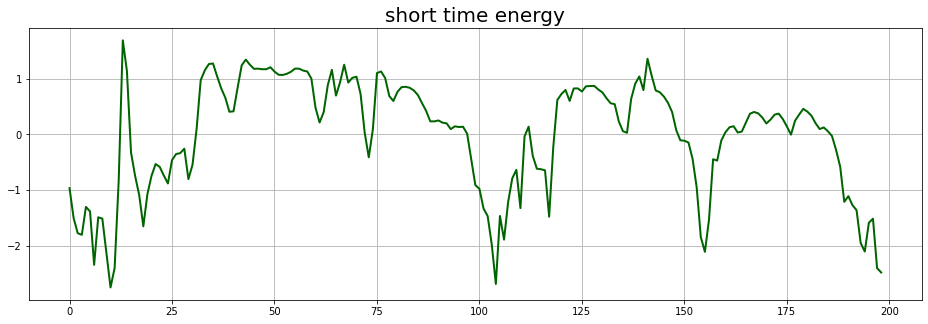

In [10]:
energy = compute_log_nrg(sframes)

plt.plot(energy, color='darkgreen', linewidth=2)
plt.title("short time energy", fontsize=20)
plt.savefig('energy plot.png')
plt.show()

In [11]:
# percent_high_nrg is the VAD context ratio. It helps smooth the
# output VAD decisions. Higher values are more strict.
percent_high_nrg = 0.6
vad = nrg_vad(sframes, percent_high_nrg, init_silence_len, win_len, hop_len)

C:\Users\maede\AppData\Local\Temp/ipykernel_20596/831907050.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  if var_new/var_old > 1.25:


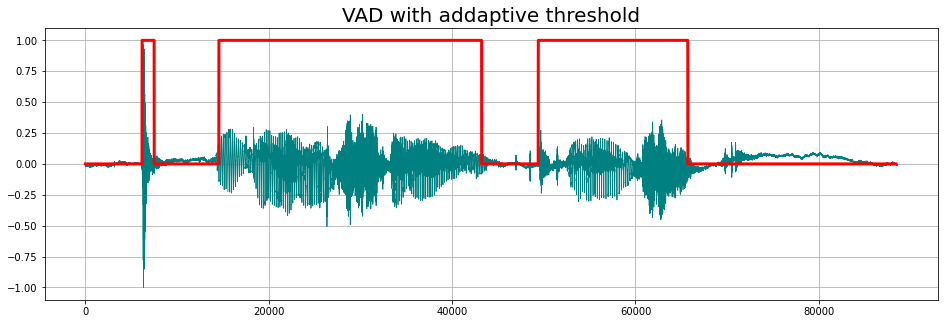

In [12]:
x = deframe(vad,win_len,hop_len)
x = x.squeeze()
plt.plot(data/max(abs(data)),color='#008080', linewidth=0.8)
plt.plot(x/max(abs(x)),color='red', linewidth=3)
# plt.axhline(y=-1.228, color='g', linestyle='-')
plt.title("VAD with addaptive threshold", fontsize=20)
plt.savefig('VAD with addaptive threshold.png')
plt.show()

<hr>
<div id="section8" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
VAD using gaussian kernels
</div>
</div>

<div style="text-align: center; color: green;"> inspired by <br>
    <a href="https://www.researchgate.net/publication/326428101_Energy-based_voice_activity_detection_algorithm_using_Gaussian_and_Cauchy_kernels"> https://www.researchgate.net/publication/326428101_Energy-based_voice_activity_detection_algorithm_using_Gaussian_and_Cauchy_kernels </a> </div>
<br>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    مهم ترین نکته ی این روش در نظر گرفتن کرنل گوسی به عنوان معیاری برای تخمین شباهت است.
    <br>
   الگوریتم KVAD  :
    <div style="direction:ltr; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
Apply a feature extractor in the first samples of the voice signal ($f_0$)
    <br>
    Apply a feature extractor in the next frames, $u_1,...,u_N$ ,
named $f_1, f_2,...,f_N$, where $N+1$ is the number of the
digital signal frames to be tested.
    <br>
    Compute $κ(f_0,f_j)$, with $1≤j≤N$
    <br>
       Make a decision, if $κ(f_0,f_j) ≤ τ_0$, with $1 ≤ j ≤ N$ then
        the $jth$ frame has voice activity, so mark it as a <span style="color: #0bd100;">speech</span>
        frame, otherwise mark it as <span style="color: red;">non-speech</span> frame.
</div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    در اینجا feature همان انرژی درنظر گرفته شده است.
و 
    $τ_0$ همان مقدارآستانه ی اولیه است(در کد thr) و همچنین 
     $κ(x,y)$
    مطابق زیر تعریف میشود:
    <br>
    <div style="direction: ltr">
    $κ(x,y) = exp(- \frac{||x - y||^2}{2ξ^2})$
    </div>
</div>

<hr>
<div id="section9" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
Implementation of VAD using gaussian kernels
</div>
</div>

In [13]:
#eps : kernel bandwidth     
def k_cal(x, y, eps=0.5):
    """
        calculate k value
    """
    dist = x - y
    p = -1*np.dot(dist, dist.T)/(2*eps*eps)
    return np.exp(p)
    
def nrg_vad(xframes,thr=0.2):
    xframes = zero_mean(xframes) #u0..u[N]
    n_frames = xframes.shape[0]
    # Compute per frame energies:
    xnrgs = compute_log_nrg(xframes) #f0..f[N]
    xvad = np.zeros((n_frames,1))
    for i in range(1, n_frames):
        if k_cal(xframes[0], xframes[i]) <= thr:
            xvad[i] = 1.
        else:
            xvad[i] = 0.
    return xvad

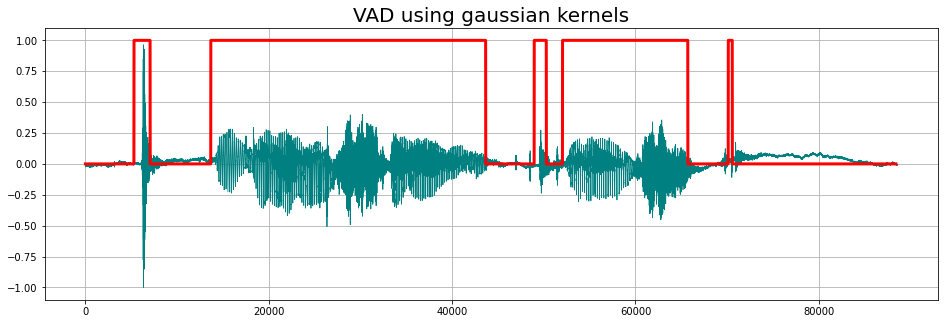

In [14]:
vad2 = nrg_vad(sframes)
x = deframe(vad2,win_len,hop_len)
x = x.squeeze()
plt.plot(data/max(abs(data)),color='#008080', linewidth=0.8)
plt.plot(x/max(abs(x)),color='red', linewidth=3)
plt.title("VAD using gaussian kernels", fontsize=20)
plt.savefig('VAD using gaussian kernels.png')
plt.show()

<hr>
<div id="section10" style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
<div style="font-size: 22px; color: #E53935; font-weight: bold">
Hamming Window
</div>
</div>

<div style="direction:rtl; font-size: 17px; font-family: 'XB Zar'; line-height: 200%">
    درین قسمت مثالی برای درک بهتر smooth شدن سیگنال توسط hamming window می آوریم.
    در این مثال پنجره را در یکی از فریم های سیگنال صوتی مان ضرب میکنیم و هر دو را برای مقایسه رسم میکنیم. (نمودار قرمز رنگ فریم سیگنال اصلی و نمودار آبی رنگ سیگنال حاصل از ضرب در hamming window و درنهایت نمودار مشکی رنگ نمودار خود پنجره همینگ است)
</div>

In [15]:
plt.rcParams['figure.figsize'] = (14, 4) # set the figure size

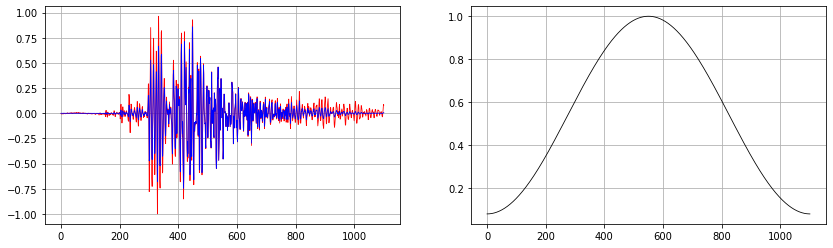

In [16]:
one_frame = data[6000:7102]
hamm_window = hamming(win_len)
weighted_frame = one_frame * hamm_window
plt.subplot(121)
plt.plot(one_frame,color='red', linewidth=0.8)
plt.plot(weighted_frame,color='blue', linewidth=0.8)
plt.subplot(122)
plt.plot(hamm_window,color='black', linewidth=0.8); # plot hamming window